In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("C:/Users/arich/OneDrive/Desktop/AI LESSON/LESSONS/8. Supervised Learning/Project/Covid19_With_GDP_Values.csv")
data = df.copy()
data

,Unnamed: 0,Country/Region,Date,Province/State,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
0,0,Afghanistan,2021-01-01,0,52513.0,2201.0,41727.0,1.426650e+10,11.934,NaN
1,1,Afghanistan,2022-01-01,0,158107.0,7356.0,0.0,1.450216e+10,14.100,NaN
2,2,Albania,2021-01-01,0,58316.0,1181.0,33634.0,1.793057e+10,12.473,123.448662
3,3,Albania,2022-01-01,0,210224.0,3217.0,0.0,1.891638e+10,11.588,131.750835
4,4,Algeria,2021-01-01,0,99897.0,2762.0,67395.0,1.862654e+11,13.607,166.218895
...,...,...,...,...,...,...,...,...,...,...
335,335,West Bank and Gaza,2022-01-01,0,469748.0,4919.0,0.0,1.916550e+10,24.420,117.301113
336,336,Zambia,2021-01-01,0,20997.0,390.0,18773.0,2.209642e+10,5.195,299.818966
337,337,Zambia,2022-01-01,0,257948.0,3740.0,0.0,2.916378e+10,5.993,332.778677
338,338,Zimbabwe,2021-01-01,0,14084.0,369.0,11347.0,2.837124e+10,9.540,5411.002445


##### **Dataset Columns Explanation:**
- **Country/Region** → The name of the country.
- **Date** → The specific date (yearly) of the data.
- **Province/State** → The province or state within the country (if applicable).
- **Confirmed** → The number of confirmed COVID-19 cases.
- **Deaths** → The number of deaths due to COVID-19.
- **Recovered** → The number of recoveries from COVID-19.
- **GDP** → A country's GDP or gross domestic product is calculated by taking into account the monetary worth of a nation's goods and services after a certain period of time, usually one year. It's a measure of economic activity.
- **Unemployment** → The unemployment rate, usually expressed as a percentage of the total labor force that is unemployed but actively seeking employment and willing to work.
- **CPI** → The Consumer Price Index, which measures the average change over time in the prices paid by consumers for a market basket of consumer goods and services.

### Data Preparation:

#### Checking the data:

In [3]:
df_check = data.copy()

for column in df_check.columns:
    df_check[column] = pd.Series(df_check[column].unique())

print(df_check.head())

   Unnamed: 0 Country/Region        Date  \
0           0    Afghanistan  2021-01-01   
1           1        Albania  2022-01-01   
2           2        Algeria         NaN   
3           3        Andorra         NaN   
4           4         Angola         NaN   

                                      Province/State  Confirmed  Deaths  \
0                                                  0    52513.0  2201.0   
1  Australian Capital TerritoryNew South WalesNor...   158107.0  7356.0   
2  AlbertaBritish ColumbiaDiamond PrincessGrand P...    58316.0  1181.0   
3  AnhuiBeijingChongqingFujianGansuGuangdongGuang...   210224.0  3217.0   
4                             Faroe IslandsGreenland    99897.0  2762.0   

   Recovered           GDP  Unemployment         CPI  
0    41727.0  1.426650e+10        11.934         NaN  
1        0.0  1.450216e+10        14.100  123.448662  
2    33634.0  1.793057e+10        12.473  131.750835  
3    67395.0  1.891638e+10        11.588  166.218895  
4     746

In [4]:
data.isnull().sum()

Unnamed: 0        0
Country/Region    0
Date              0
Province/State    0
Confirmed         0
Deaths            0
Recovered         0
GDP               0
Unemployment      0
CPI               2
dtype: int64

In [5]:
data[data['CPI'].isnull()]

,Unnamed: 0,Country/Region,Date,Province/State,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
0,0,Afghanistan,2021-01-01,0,52513.0,2201.0,41727.0,1.426650e+10,11.934,NaN
1,1,Afghanistan,2022-01-01,0,158107.0,7356.0,0.0,1.450216e+10,14.100,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      340 non-null    int64  
 1   Country/Region  340 non-null    object 
 2   Date            340 non-null    object 
 3   Province/State  340 non-null    object 
 4   Confirmed       340 non-null    float64
 5   Deaths          340 non-null    float64
 6   Recovered       340 non-null    float64
 7   GDP             340 non-null    float64
 8   Unemployment    340 non-null    float64
 9   CPI             338 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 26.7+ KB


In [7]:
data.duplicated().sum()

0

#### Clearing Data:

In [8]:
data = data.drop(['Unnamed: 0','Province/State'], axis=1)
data

,Country/Region,Date,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
0,Afghanistan,2021-01-01,52513.0,2201.0,41727.0,1.426650e+10,11.934,NaN
1,Afghanistan,2022-01-01,158107.0,7356.0,0.0,1.450216e+10,14.100,NaN
2,Albania,2021-01-01,58316.0,1181.0,33634.0,1.793057e+10,12.473,123.448662
3,Albania,2022-01-01,210224.0,3217.0,0.0,1.891638e+10,11.588,131.750835
4,Algeria,2021-01-01,99897.0,2762.0,67395.0,1.862654e+11,13.607,166.218895
...,...,...,...,...,...,...,...,...
335,West Bank and Gaza,2022-01-01,469748.0,4919.0,0.0,1.916550e+10,24.420,117.301113
336,Zambia,2021-01-01,20997.0,390.0,18773.0,2.209642e+10,5.195,299.818966
337,Zambia,2022-01-01,257948.0,3740.0,0.0,2.916378e+10,5.993,332.778677
338,Zimbabwe,2021-01-01,14084.0,369.0,11347.0,2.837124e+10,9.540,5411.002445


I removed the State column because it doesn't give me a lot, because we are looking on countries. It can just complicate the calculations of the model.  
also the data was not splitting by states so i cant tell each state condition. I found this colum unnecessary.  
I removed the Unnamed columns because it is numbering that the CSV had for the data and pandas already have numbering in the Dataframe.

In [9]:
data.dropna(inplace=True)
data

,Country/Region,Date,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
2,Albania,2021-01-01,58316.0,1181.0,33634.0,1.793057e+10,12.473,123.448662
3,Albania,2022-01-01,210224.0,3217.0,0.0,1.891638e+10,11.588,131.750835
4,Algeria,2021-01-01,99897.0,2762.0,67395.0,1.862654e+11,13.607,166.218895
5,Algeria,2022-01-01,218818.0,6284.0,0.0,2.255603e+11,12.437,181.619932
6,Andorra,2021-01-01,8117.0,84.0,7463.0,3.324683e+09,12.437,181.619932
...,...,...,...,...,...,...,...,...
335,West Bank and Gaza,2022-01-01,469748.0,4919.0,0.0,1.916550e+10,24.420,117.301113
336,Zambia,2021-01-01,20997.0,390.0,18773.0,2.209642e+10,5.195,299.818966
337,Zambia,2022-01-01,257948.0,3740.0,0.0,2.916378e+10,5.993,332.778677
338,Zimbabwe,2021-01-01,14084.0,369.0,11347.0,2.837124e+10,9.540,5411.002445


Because CPI is really important for checking our goal the GDP, I removed countries that doesn't have this value (Afghanistan).  
The only meesing value was the CPI of Afghanistan so i could do dropna on all the table.

#### Preparing the data:

In [10]:
# Group by 'Country/Region' - doing aggregation for years 2020-2021
aggregated_df = data.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'GDP': 'mean',
    'Unemployment': 'mean',
    'CPI': 'mean'
}).reset_index()

aggregated_df['GDP'] = aggregated_df['GDP'] /1000000000
aggregated_df

,Country/Region,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
0,Albania,268540.0,4398.0,33634.0,18.423472,12.0305,127.599748
1,Algeria,318715.0,9046.0,67395.0,205.912838,13.0220,173.919413
2,Andorra,31857.0,224.0,7463.0,3.352643,12.4370,181.619932
3,Angola,99966.0,2177.0,11146.0,85.452438,15.2460,645.998608
4,Antigua and Barbuda,4442.0,124.0,148.0,1.734550,14.6930,123.019852
...,...,...,...,...,...,...,...
164,Uzbekistan,276212.0,2099.0,75244.0,75.370719,4.9400,375.337755
165,Vanuatu,8.0,1.0,1.0,0.986307,4.9525,130.479616
166,West Bank and Gaza,608971.0,6337.0,118926.0,18.637250,25.4050,115.185995
167,Zambia,278945.0,4130.0,18773.0,25.630100,5.5940,316.298821


The convertion from categorical features to numerical form will be done before the model learning.  
For now I will keep it with the countries to explore the data.  
I also devided the GDP by billion so the numbers wont be so high for the calculations, so now the numbers in billions.

#### Exploring the Data:

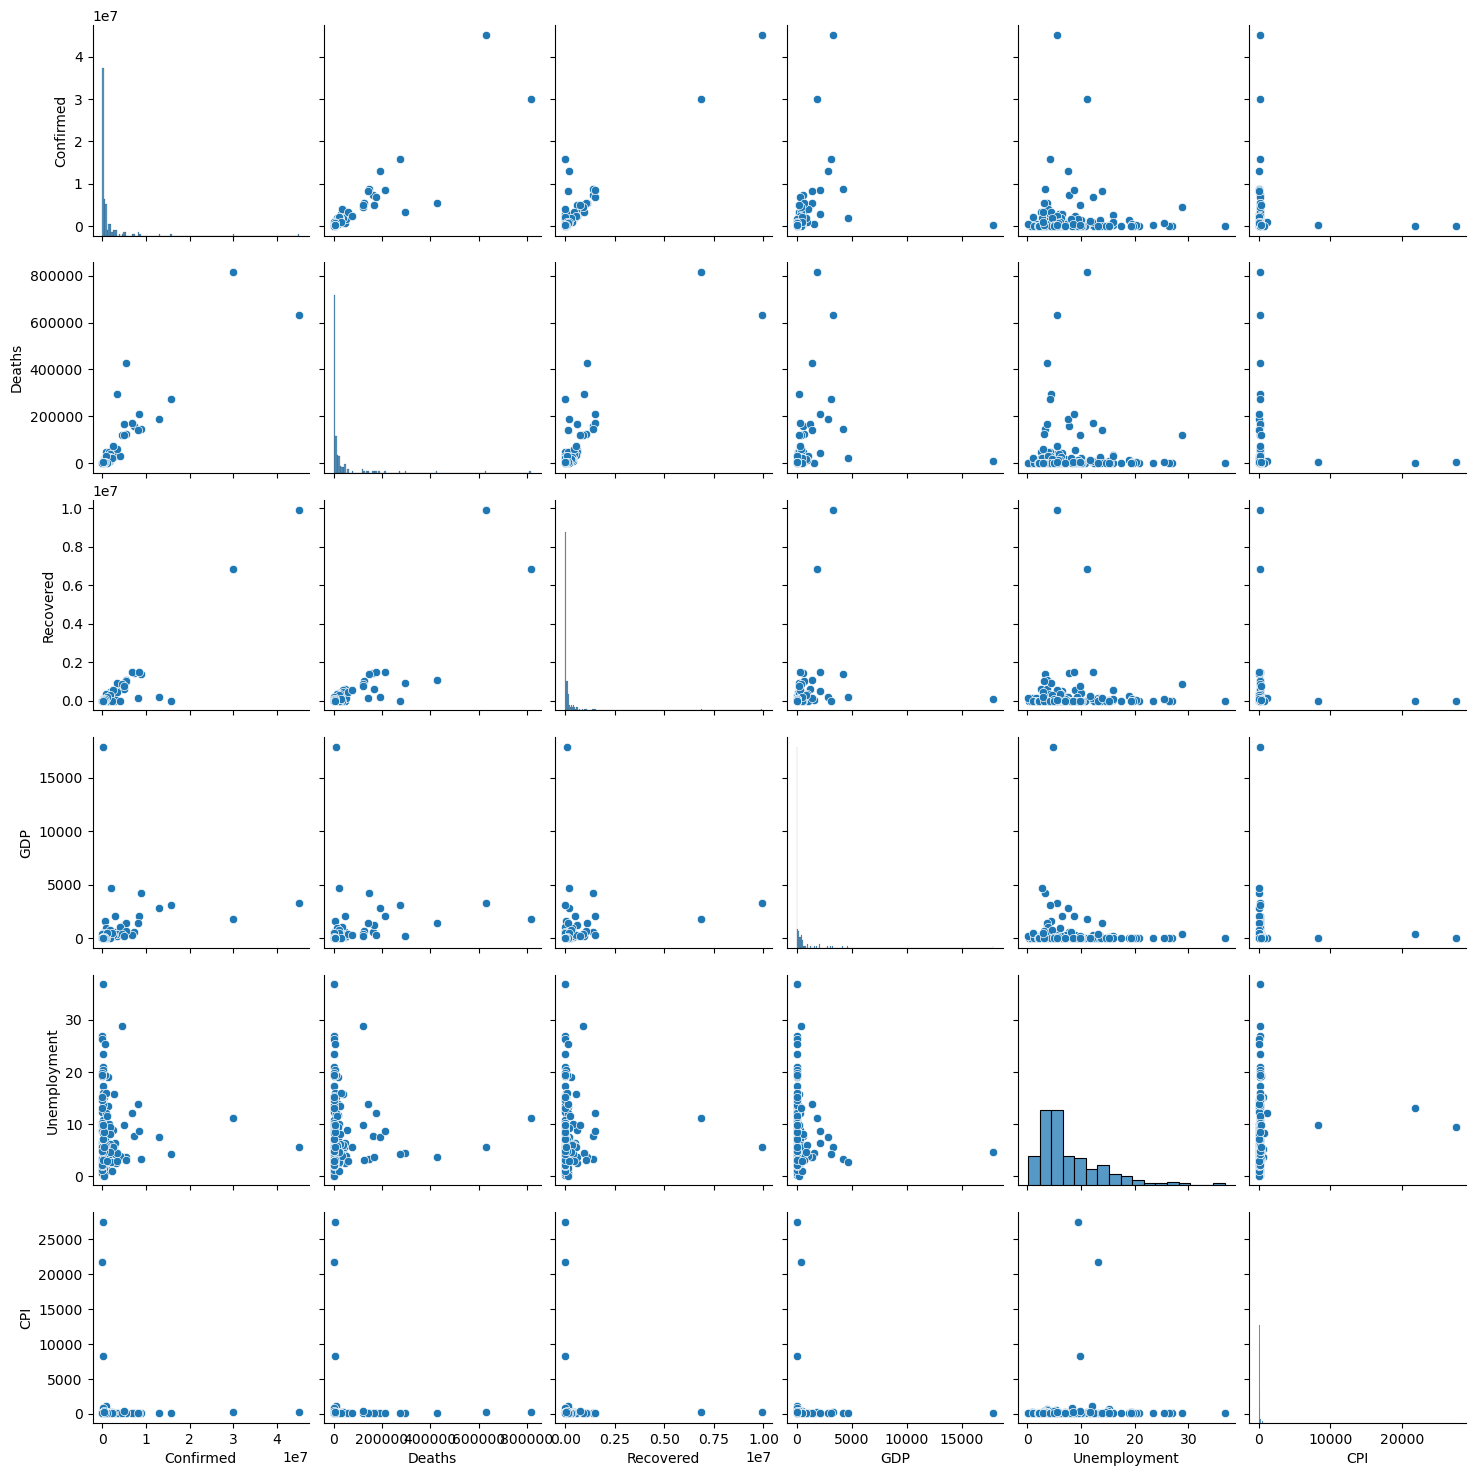

In [11]:
sns.pairplot(data=aggregated_df)

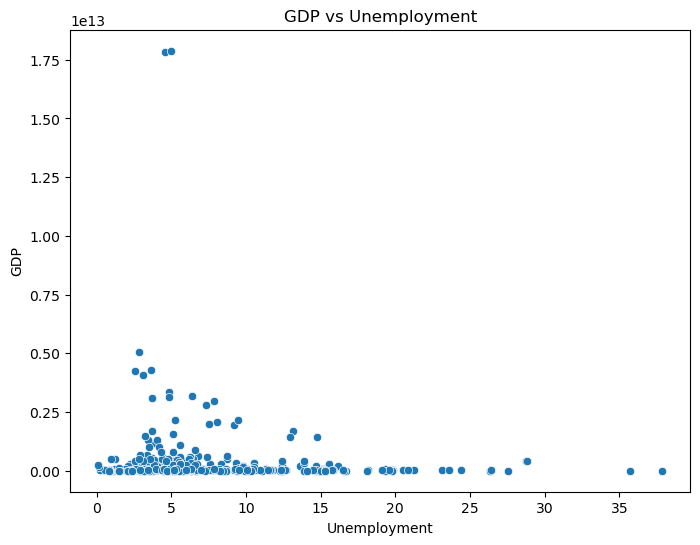

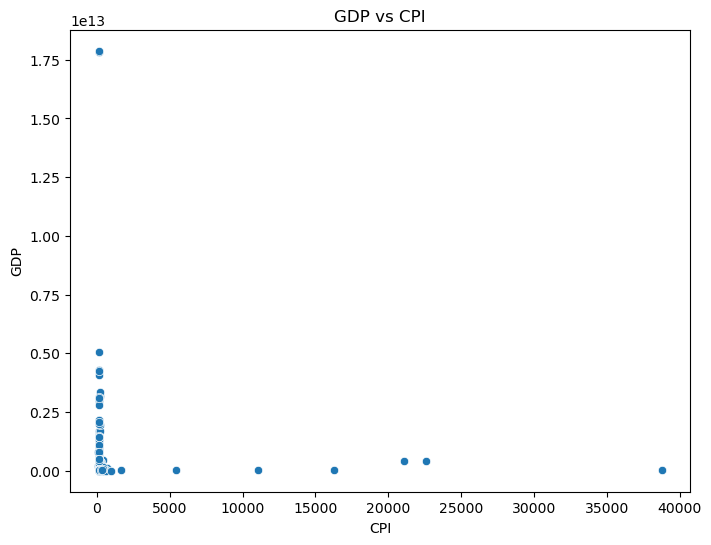

In [12]:
# GDP vs Unemployment
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Unemployment', y='GDP', data=data)
plt.title('GDP vs Unemployment')
plt.show()

# GDP vs CPI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CPI', y='GDP', data=data)
plt.title('GDP vs CPI')
plt.show()

In [13]:
correlation_with_gdp = aggregated_df.drop('Country/Region', axis=1).corr()['GDP']
correlation_with_gdp

Confirmed       0.274813
Deaths          0.243658
Recovered       0.204519
GDP             1.000000
Unemployment   -0.094615
CPI            -0.021508
Name: GDP, dtype: float64

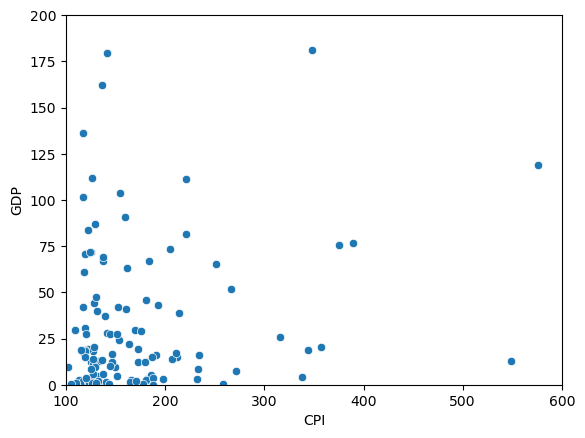

In [14]:
sns.scatterplot(data=aggregated_df, x='CPI', y='GDP')
plt.xlim(100, 600)
plt.ylim(0, 200)
plt.show()

We can see in the data exploration by the graphs and the correlation score (Pandas method), that there is not such a good correlation between the label and each of the features. we can see from here that probably the 

## Models Training:

Now when we are going to train the model we don't need the country column, it doesn't help for the results. Strings can interfare for linear and polynominal regression and doing get_dummies will create a lot of unnecessary columns and will increase the computing consumption of the model so it is better to remove it.

In [15]:
model_df = aggregated_df.drop(['Country/Region'], axis=1)
model_df

,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
0,268540.0,4398.0,33634.0,18.423472,12.0305,127.599748
1,318715.0,9046.0,67395.0,205.912838,13.0220,173.919413
2,31857.0,224.0,7463.0,3.352643,12.4370,181.619932
3,99966.0,2177.0,11146.0,85.452438,15.2460,645.998608
4,4442.0,124.0,148.0,1.734550,14.6930,123.019852
...,...,...,...,...,...,...
164,276212.0,2099.0,75244.0,75.370719,4.9400,375.337755
165,8.0,1.0,1.0,0.986307,4.9525,130.479616
166,608971.0,6337.0,118926.0,18.637250,25.4050,115.185995
167,278945.0,4130.0,18773.0,25.630100,5.5940,316.298821


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = model_df.drop('GDP', axis=1)
y = model_df['GDP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### Vanila Linear Regression:

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

linear_modal = LinearRegression()

lr_scores = cross_validate(linear_modal, scaled_X_train, y_train, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'], cv=7)
lr_scores = pd.DataFrame(lr_scores)
lr_scores

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.000991,0.001297,-1206.574979,-1.854651e+07,-4306.566452
1,0.001042,0.000985,-487.016299,-5.153980e+05,-717.912259
2,0.000998,0.000000,-304.535024,-1.083755e+05,-329.204275
3,0.001000,0.000000,-284.752869,-1.476823e+05,-384.294571
4,0.000000,0.001000,-329.681507,-1.313377e+05,-362.405419
5,0.000000,0.000999,-516.141116,-7.481299e+05,-864.944999
6,0.000000,0.001001,-308.161650,-1.462571e+05,-382.435806


##### Note:  
I splited the dataset to train and test before the cross validation so it means we are doing LOOCV (Leave one out cross validation), I did it because that what was written to do in the excercise.  
When doing LOOCV it is better to keep less data for the test something like 10%.

In [18]:
lr_MAE = lr_scores['test_neg_mean_absolute_error'].mean() *-1
lr_MSE = lr_scores['test_neg_mean_squared_error'].mean() *-1
lr_RMSE = lr_scores['test_neg_root_mean_squared_error'].mean() *-1

print(f'MAE: {lr_MAE}')
print(f'MSE: {lr_MSE}')
print(f'RMSE: {lr_RMSE}')

mae_precent = lr_MAE/model_df['GDP'].mean() * 100
rmse_precent = lr_RMSE/model_df['GDP'].mean() * 100

print(f"MAE PRECENT: {mae_precent}%")
print(f"MAE PRECENT: {rmse_precent}%")

MAE: 490.9804921429319
MSE: 2906242.1536611957
RMSE: 1049.6805401590248
MAE PRECENT: 123.76078616417425%
MAE PRECENT: 264.5915488501678%


The basic linear model doesn't give good results, as we saw before there is no good correlation between the label and the features.

#### Linear Regression with L1 Regularization (Lasso):

In [19]:
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(eps=0.1, n_alphas=100)
lasso_cv_model.fit(scaled_X_train, y_train)

lasso_cv_predictions = lasso_cv_model.predict(scaled_X_test)


In [20]:
print('This is the test predictions:')
print(lasso_cv_predictions)
print()
print()
print('This is the features betas:')
print(lasso_cv_model.coef_)
print()
print()
print('The best alpha for the L1 model regulation:')
print(lasso_cv_model.alpha_)

This is the test predictions:
[ 387.55529036  394.8168129   342.5135675   332.24003067  251.72132531
 1640.23868031  349.76307992  409.60915047  402.57944167  259.30127974
  298.68060829  287.26255811  410.75163015  421.83667631  352.96782116
  200.91967002  400.00375761  357.47755427  362.39324704  169.63650463
  275.23038969  393.07637677  500.19812224  419.49268819  303.41608919
  407.09896821  425.25061394  282.74986008  537.89434702  160.20238058
   83.45619161  362.32861162  388.05303948  368.34026204 4027.38674295
  370.00599072  261.24118861  592.46343282  429.76626218  325.95184686
  362.45363288  380.96211268  415.99986029  391.01083893  306.37692314
  374.39792193  230.56515687  387.17024482  482.95260783  429.54357109
  442.23205201]


This is the features betas:
[278.82810245   0.          -0.         -77.18608794  -0.        ]


The best alpha for the L1 model regulation:
71.67291317028841


In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

lasso_cv_MAE = mean_absolute_error(y_test, lasso_cv_predictions)
lasso_cv_MSE = mean_squared_error(y_test,lasso_cv_predictions)
lasso_cv_RMSE = np.sqrt(lasso_cv_MSE)

print(f'MAE: {lasso_cv_MAE}')
print(f'MSE: {lasso_cv_MSE}')
print(f'RMSE: {lasso_cv_RMSE}')

MAE: 395.6749860413582
MSE: 472225.3042152147
RMSE: 687.1865134119082


#### Linear Regression with L2 Regularization (Ridge):

In [22]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,mean_squared_error

ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')
ridge_cv_model.fit(scaled_X_train, y_train)

ridge_cv_prediction = ridge_cv_model.predict(scaled_X_test)

ridge_MAE = mean_absolute_error(y_test, ridge_cv_prediction)
ridge_MSE = mean_squared_error(y_test,ridge_cv_prediction)
ridge_RMSE = np.sqrt(mean_squared_error(y_test, ridge_cv_prediction))
               
print(f'MAE: {ridge_MAE}')
print(f'MSE: {ridge_MSE}')
print(f'RMSE: {ridge_RMSE}')

MAE: 361.55632958394835
MSE: 414326.7720078863
RMSE: 643.6821979889504


In [23]:
ridge_cv_model.coef_

array([ 699.30411652,    5.93946631, -390.06257089, -144.16788331,
        -28.05893528])

In [24]:
ridge_cv_model.alpha_

0.1

This is the best alpha for the L2 model regulation : 0.1

#### Polynomial Regression:

Note:  
I saw that there is a way to do pipeline and to give parameters to check also for the polynomial degree and the alpha for the ridge model, because we didn't learn it in the class I didn't do it here and decided to do for loop for the polynomial degree and gridsearch for the alpha of the ridge model.

Degree 2, Best Alpha: 100.0, Best Score: -2916906.8836906897
Degree 2, Test MSE: 494184.4842661914
Degree 3, Best Alpha: 100.0, Best Score: -2980501.654655473
Degree 3, Test MSE: 485410.80449543014
Degree 4, Best Alpha: 100.0, Best Score: -3035689.4161881157
Degree 4, Test MSE: 487910.77285963553
Degree 5, Best Alpha: 100.0, Best Score: -3064344.250637963
Degree 5, Test MSE: 497079.6929559568
Degree 6, Best Alpha: 100.0, Best Score: -3070355.928339205
Degree 6, Test MSE: 523762.1752347281
Degree 7, Best Alpha: 100.0, Best Score: -3062827.375617364
Degree 7, Test MSE: 576197.6171267221


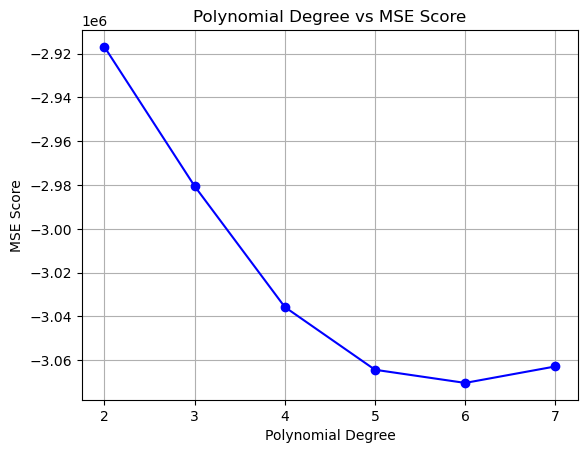

In [25]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge

X = aggregated_df.drop(['GDP', 'Country/Region'] , axis=1)
y = aggregated_df['GDP']

ridge_model = Ridge()

param_grid = {
    'alpha' : [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

mean_test_scores = []

for deg in range(2,8):

    polynomial_converter = PolynomialFeatures(degree=deg, include_bias=False)
    polynimial_features = polynomial_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(polynimial_features, y, test_size=0.3, random_state=42)

    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    grid = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid.fit(scaled_X_train,y_train)

    best_score = grid.best_score_
    mean_test_scores.append(best_score)

    print(f'Degree {deg}, Best Alpha: {grid.best_params_["alpha"]}, Best Score: {best_score}')
    
    # Evaluate the model on the test set
    best_model = grid.best_estimator_
    y_pred = best_model.predict(scaled_X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    print(f'Degree {deg}, Test MSE: {test_mse}')


plt.plot(range(2, 8), mean_test_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE Score')
plt.title('Polynomial Degree vs MSE Score')
plt.grid(True)
plt.show()

The error between 5, to 6 degrees are not being changed a lot.  
Seems like 5 degrees gives good results with less complexity.  

In [26]:
#Train Polynomial Regression with L2 regulation
#With the best parameters we have found: L2_alpha = 100 , Polynominal_degree = 5

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV

polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)
polynimial_features = polynomial_converter.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(polynimial_features, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

poly_ridge_cv_model = RidgeCV(alphas=[100], cv=5, scoring='neg_mean_absolute_error')
poly_ridge_cv_model.fit(scaled_X_train, y_train)

poly_ridge_cv_prediction = poly_ridge_cv_model.predict(scaled_X_test)

poly_ridge_MAE = mean_absolute_error(y_test, poly_ridge_cv_prediction)
poly_ridge_MSE = mean_squared_error(y_test,poly_ridge_cv_prediction)
poly_ridge_RMSE = np.sqrt(mean_squared_error(y_test, poly_ridge_cv_prediction))
               
print(f'MAE: {poly_ridge_MAE}')
print(f'MSE: {poly_ridge_MSE}')
print(f'RMSE: {poly_ridge_RMSE}')

MAE: 412.3314366316839
MSE: 497079.6929559568
RMSE: 705.0387882634237


#### Check the models results:

In [27]:
results = {
    'Model': ['Linear Regression', 'Linear reg with L1', 'Linear reg with L2', 'Polynomial Reg'],
    'MAE': [lr_MAE, lasso_cv_MAE, ridge_MAE, poly_ridge_MAE],
    'MSE': [lr_MSE, lasso_cv_MSE, ridge_MSE, poly_ridge_MSE],
    'RMSE': [lr_RMSE, lasso_cv_RMSE, ridge_RMSE, poly_ridge_RMSE]
}

results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
results_df

,MAE,MSE,RMSE
Model,,,
Linear Regression,490.980492,2.906242e+06,1049.680540
Linear reg with L1,395.674986,4.722253e+05,687.186513
Linear reg with L2,361.556330,4.143268e+05,643.682198
Polynomial Reg,412.331437,4.970797e+05,705.038788


The results for the models doesn't looks good, seems that they are very high and that the models doen't give a good prediction.
We saw at the data exploration section that there is no correlation between the features and the label so it is not unexpected.
To check myself and the code, I took a different dataset that is known as good for linear/polynimial regression and executed the code on it (needed some adjustments) and it seems that the code is good so I asume that the results is because of this dataset.

##### Seems that Linear Regression with L2 Regularization (Ridge) has the lowest results.

##### Note:  
I wouldn't continue from here because the models doesn't have a good results so they won't predict good but just for showing how to train on all the data, exporting and importing model and converter and using them I did it below

#### Train on all the data:

In [28]:
#We found before that alpha=0.1 is the best

from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

ridge_cv_model = RidgeCV(alphas=[0.1], scoring='neg_mean_absolute_error')
ridge_cv_model.fit(scaled_X, y)

RidgeCV(alphas=[0.1], scoring='neg_mean_absolute_error')

#### Exporting the scaler and the model:

In [29]:
from joblib import dump, load

dump(scaler, 'COVID19_ridge_cv_model_scaler.joblib')
dump(ridge_cv_model, 'COVID19_ridge_cv_model.joblib')

['COVID19_ridge_cv_model.joblib']

#### Loading the model and using it:

In [30]:
loaded_converter = load('COVID19_ridge_cv_model_scaler.joblib')
loaded_model = load('COVID19_ridge_cv_model.joblib')

In [31]:
transformed_data = loaded_converter.fit_transform(X)
prediction = loaded_model.predict(transformed_data)
prediction

array([ 175.00523981,  147.02447347,  134.16184443,   87.51403758,
         86.58302212,  886.97497767,  216.33210797,  380.77680779,
        402.88169755,  325.45879573,  380.01341572,  430.60203204,
        209.69629538,  383.71709209,  819.43736009,  197.35291436,
        360.17341395,  278.4240117 ,  384.16155406,  146.22153244,
        -54.12659051, 2368.62877158,  423.5019567 ,  283.07865248,
        373.06121081,  122.83722686,  406.98579133,  323.16796654,
        541.6721071 ,  256.98259902,  362.88785111,  365.27082873,
        288.1519341 ,  655.89803944,  269.2908567 ,  186.30857084,
        343.073846  ,  310.47812003,  547.78631181,  277.32221809,
        630.63832244,  408.91082523, -166.93251699, -153.96336889,
        293.58318929,  368.33090376,  321.90497055,  204.70938075,
        263.77248757,  309.741335  , -359.10452586,  356.76557667,
        305.27877316,  285.88278224, 2703.61383615,  -37.13964423,
        254.40441216, 1282.90417347,  330.3584593 ,  333.14783

##### Note:
If we will perform the model on a new dataset we will need to bring it to the same columns as X have and also to devide the GDP so the values will be in Trillion as we did here.